## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()
df.tail()

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()
most_posts = df['POSTS'].idxmax()
df['TAG'].loc[most_posts]

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby(["TAG"]).count()

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
#Method 2
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
df

## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [5]:
df.shape

In [5]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

In [ ]:
df.head()

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
df.groupby('TAG').sum() #This is deprecated

In [5]:
df.groupby('TAG')['POSTS'].sum() #You specify 'POSTS' as the column to which you want the sum

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.shape
reshaped_df.head()
reshaped_df.tail()
reshaped_df.columns
reshaped_df.fillna(0, inplace=True)  #Method 1
# reshaped_df = reshaped_df.fillna(0) #Method 2
reshaped_df.isna().values.any() #Check if there are any NaN values left in the entire DataFrame

In [ ]:
plt.plot(reshaped_df.index, reshaped_df['python']) #You just pass in X and Y values

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Posts', fontsize=14)
plt.ylim(0, 35000)
# #Plotting 1 at a time
# plt.plot(reshaped_df.index, reshaped_df['python']) #Drawin first graph
# plt.plot(reshaped_df.index, reshaped_df['java']) #Draw in second graph
#Insteade of plotting 1 at a time, you can use a for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

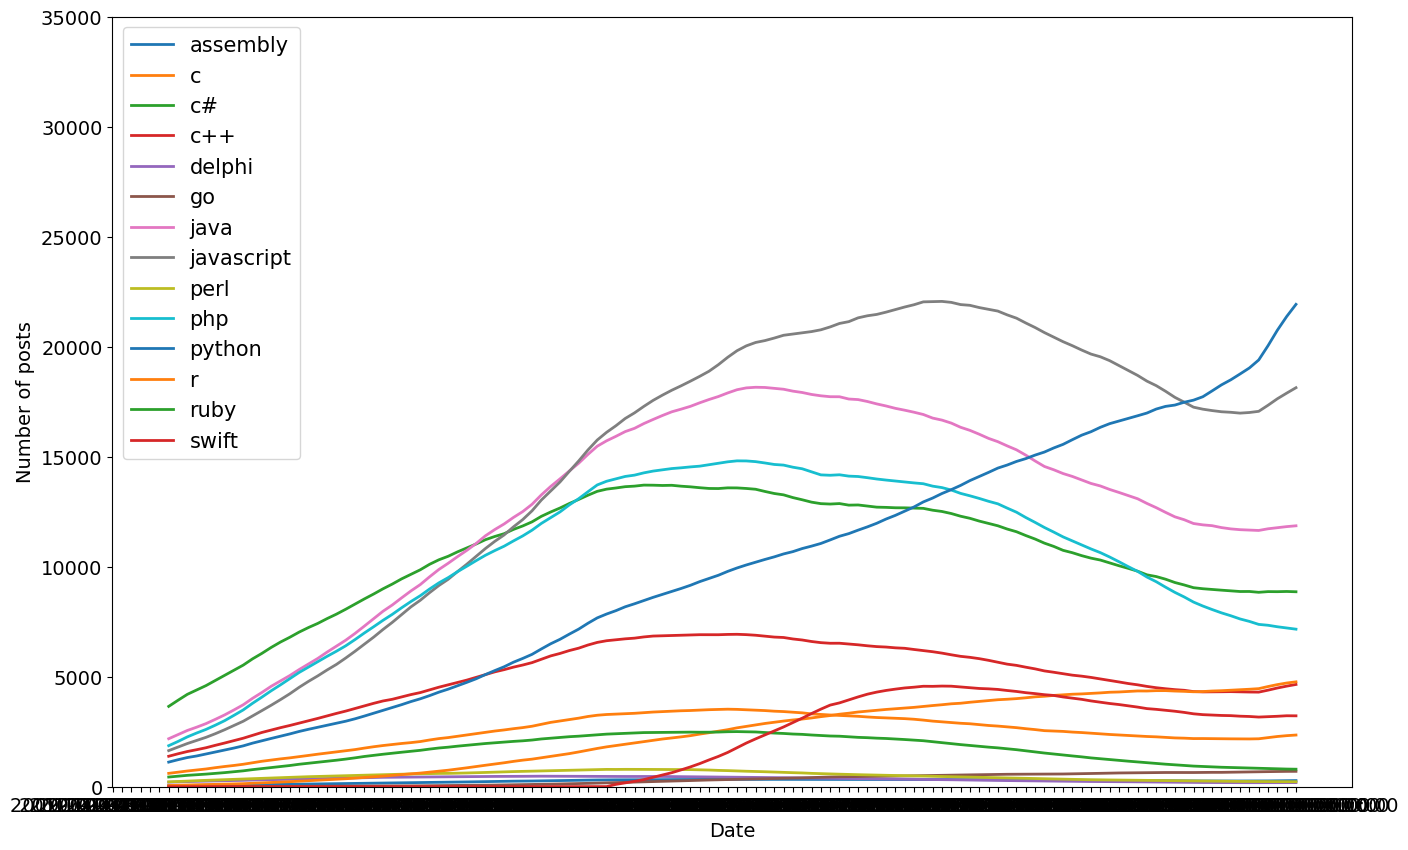

In [28]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=24).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
#Plot the roll instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=2, label=roll_df[column].name)
plt.legend(fontsize=15)